In [28]:
import theano
from theano import tensor as T
import numpy as np

%matplotlib inline

In [80]:
train_x = np.linspace(-1,1,101)
train_y = 2 * train_x + np.random.rand(*train_x.shape) * 0.33

X = T.scalar()
Y = T.scalar()

def model(X,W,b):
    return X * W + b

W = theano.shared(np.asarray(0., dtype=theano.config.floatX))
b = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X,W,b)

cost = T.mean(T.square(y - Y))
gradientW = T.grad(cost=cost, wrt=W)
gradientb = T.grad(cost=cost, wrt=b)

alpha = 0.01
updates = [[W, W - gradientW * alpha], [b, b - gradientb * alpha]]

train = theano.function(inputs=[X,Y], outputs=cost, updates=updates, allow_input_downcast=True)

for i in range(200):
    for x,y in zip(train_x, train_y):
        train(x,y)

print('Weight Value: ', W.get_value())
print('Slope Value: ' ,b.get_value())

Weight Value:  2.008747274099306
Slope Value:  0.14121197849612427


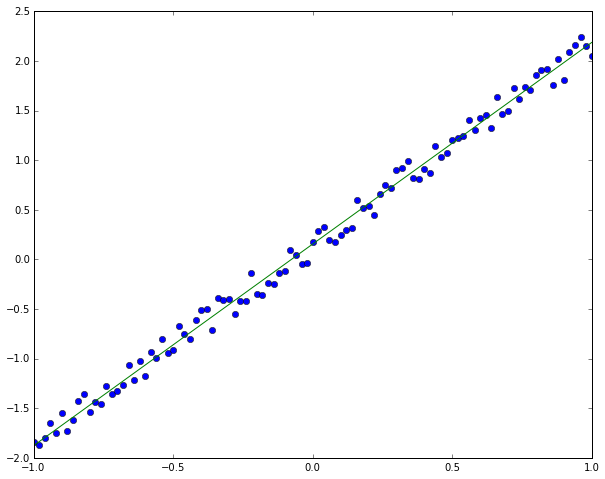

In [79]:
from matplotlib import pyplot as plt
import matplotlib

matplotlib.pylab.rcParams['figure.figsize'] = (10.0, 8.0)

plt.plot(train_x, train_y, 'o')
train_x
regressionLine = train_x * W.get_value() + b.get_value()
plt.plot(train_x, regressionLine)
plt.show()